
# Python Data Wrangling with `pandas`: Part 2

* * * 
<div class="alert alert-success">  
    
### Learning Objectives 
    
* Gain familiarity with `pandas` and the core `DataFrame` object
* Apply core data wrangling techniques in `pandas`
* Understand the flexibility of the `pandas` library
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Pandas can be used for!<br>

### Sections
4. [Missing Data](#missing)
5. [Sorting Values](#sorting)
6. [Merging](#merging)
7. [Grouping](#grouping)
8. [Visualization](#viz)

Let's start back up by importing our libraries and loading up our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Open the unemployment dataset
unemployment = pd.read_csv('../data/cleaned_country_totals.csv')
# This is some formatting that's out of scope
unemployment['date'] = pd.to_datetime(unemployment['date'])

# Open the countries dataset
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/Python-Data-Wrangling/main/data/countries.csv'
countries = pd.read_csv(countries_url)

<a id='missing'></a>
# Missing Values
When working with a new data source, it's good to get an idea of how much information is missing. `pandas` provides various methods for exploring and dealing with "missing-ness", one of which is `.isna()`

In [7]:
type(unemployment.isna())

pandas.core.frame.DataFrame

In [4]:
unemployment.isna()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6433,False,False,False,False,False,False,False,False
6434,False,False,False,False,False,False,False,False
6435,False,False,False,False,False,False,False,False
6436,False,False,False,False,False,False,False,False


The `.isna()` method returns a corresponding boolean value for each entry in the `unemployment` DataFrame. In Python, `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add up the results by column (with `.sum()`), we get a count for the **total** number of missing values by column::

In [5]:
unemployment.isna().sum()

country                0
seasonality            0
year_month             0
unemployment           0
unemployment_rate    322
date                   0
year                   0
month                  0
dtype: int64

In [8]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6438 entries, 0 to 6437
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   country            6438 non-null   object        
 1   seasonality        6438 non-null   object        
 2   year_month         6438 non-null   float64       
 3   unemployment       6438 non-null   int64         
 4   unemployment_rate  6116 non-null   float64       
 5   date               6438 non-null   datetime64[ns]
 6   year               6438 non-null   int64         
 7   month              6438 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 402.5+ KB


This is a very helpful trick, and it shows us that the only column with missing values is `unemployment_rate`.

There are a wide variety of approaches to dealing with missing data. One basic approach would be to drop any row with a missing unemployment rate record:

In [6]:
unemployment.dropna(subset=['unemployment_rate'])

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5
...,...,...,...,...,...,...,...,...
6433,uk,sa,2010.05,2417000,7.7,2010-05-01,2010,5
6434,uk,sa,2010.06,2434000,7.8,2010-06-01,2010,6
6435,uk,sa,2010.07,2420000,7.7,2010-07-01,2010,7
6436,uk,sa,2010.08,2424000,7.7,2010-08-01,2010,8


In [9]:
unemployment

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5
...,...,...,...,...,...,...,...,...
6433,uk,sa,2010.05,2417000,7.7,2010-05-01,2010,5
6434,uk,sa,2010.06,2434000,7.8,2010-06-01,2010,6
6435,uk,sa,2010.07,2420000,7.7,2010-07-01,2010,7
6436,uk,sa,2010.08,2424000,7.7,2010-08-01,2010,8


Simply running the `.dropna()` method actually doesn't alter our data -- it makes a copy then drops the missing rows for that copy. In order to save our alteration, we'll need to re-define the `unemployment` DataFrame with our altered copy:

In [11]:
unemployment = unemployment.dropna(subset=['unemployment_rate'])
unemployment

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5
...,...,...,...,...,...,...,...,...
6433,uk,sa,2010.05,2417000,7.7,2010-05-01,2010,5
6434,uk,sa,2010.06,2434000,7.8,2010-06-01,2010,6
6435,uk,sa,2010.07,2420000,7.7,2010-07-01,2010,7
6436,uk,sa,2010.08,2424000,7.7,2010-08-01,2010,8


**💡 Tip:** Note that the brackets `[]` are needed in the `dropna()` method because the subset parameter expects a list of column names. Even if you're specifying just one column, it still needs to be enclosed in brackets to indicate that it's a list. 

<a id='sorting'></a>
# Sorting Values

We've been working with data about unemployment rates, so it would probably be useful to know what the highest unemployment rates are in this data. For this, we'll use the `sort_values()` method to sort the data. We chain `.head()` onto the end of this so that we only see the first five rows:

In [12]:
unemployment.sort_values(by='date', ascending=False).head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
1154,de,sa,2010.12,2855000,6.6,2010-12-01,2010,12
6067,sk,sa,2010.12,390000,14.5,2010-12-01,2010,12
3171,ie,sa,2010.12,290000,13.8,2010-12-01,2010,12
4969,pl,sa,2010.12,1765000,10.0,2010-12-01,2010,12
1462,dk,sa,2010.12,238000,8.2,2010-12-01,2010,12


In [20]:
unemployment.sort_values(by=['date', 'country'], ascending=False).head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
6067,sk,sa,2010.12,390000,14.5,2010-12-01,2010,12
5891,si,sa,2010.12,80000,7.8,2010-12-01,2010,12
5715,se,sa,2010.12,389000,7.8,2010-12-01,2010,12
5277,pt,sa,2010.12,598000,10.9,2010-12-01,2010,12
4969,pl,sa,2010.12,1765000,10.0,2010-12-01,2010,12


The above code creates a copy of the `DataFrame`, sorted in **descending** order (note `ascending=False`), and prints the first five rows.

## 🥊 Challenge 5
Let's use sorting to answer a practical question:  

<span style="color:purple">Which country has the highest unemployment rate in our data?  
</span>
<details><summary><a>Click for hint</a></summary>
1. Use <code>.sort_values()</code> to sort this data based on the unemployment rate using descending order<br>
2. Select the top row using <code>.head()</code> with an argument for number of rows<br>
</details>



In [32]:
# YOUR CODE HERE
unemployment.sort_values(by='unemployment_rate', ascending=False).head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
1887,es,sa,2010.09,4773000,20.6,2010-09-01,2010,9
1886,es,sa,2010.08,4739000,20.5,2010-08-01,2010,8
1888,es,sa,2010.11,4723000,20.4,2010-11-01,2010,11
4878,pl,sa,2002.08,3479000,20.3,2002-08-01,2002,8
1885,es,sa,2010.07,4711000,20.3,2010-07-01,2010,7


In [34]:
unemployment.sort_values(by='unemployment_rate', ascending=False).head(1)['country'].values[0]

'es'

In [36]:
unemployment_merged = pd.merge(unemployment, countries, on='country')
unemployment_merged.sort_values(by='unemployment_rate', ascending=False).head(1)['name_en'].values[0]

'Spain'

<a id='merging'></a>
# Merging DataFrames

Our `unemployment` has a lot of interesting information, but it is unfortunately missing any full country names. We have that information in the `countries` DataFrame, but we need to find a way of combining it with `unemployment`.

In [13]:
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data by taking a look at `unemployment`

In [14]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5


These two DataFrames seem to have a similar `country` column, with two character codes for each country. Let's try doing a merge of these two datasets based on the `country` column.

`pandas` includes an easy-to-use merge function that accepts two DataFrames and a column to merge them on:

In [15]:
unemployment_merged = pd.merge(unemployment, countries, on='country')

In [16]:
unemployment_merged.head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598


<a id='grouping'></a>
# Grouping and Aggregating Data

What if we'd like to know how many observations exist for each country? To do so, we need to group the countries, then count how many times each one occurs. In other words, we're going to **group** our data **by** a specific column, and calculate some quantity within each group. The "group-by" operation is a fundamental technique used with tabular data.  


(For those who have used spreadsheet software like Excel, you might recognize that we are essentially talking about making a "Pivot-Table")

## Simple Grouping with `.value_counts()`
For simple grouping operations, we can use the handy `.value_counts()` method. We typically run this on a single column, and it will return a table showing how many observations there are for each unique value in the column. The following graphic represents the basics of the operations.
<img src="../images/valcounts.svg" align="left" width="400" alt="diagram of pandas datafram">

In [40]:
unemployment_merged['name_en'].value_counts()

name_en
Belgium                                      308
France                                       308
Denmark                                      308
Italy                                        308
Ireland                                      308
Netherlands                                  308
Luxembourg                                   308
Portugal                                     308
Sweden                                       308
United Kingdom                               306
Spain                                        272
Finland                                      253
Norway                                       240
Germany (including  former GDR from 1991)    209
Austria                                      198
Slovenia                                     165
Hungary                                      165
Poland                                       154
Czech Republic                               143
Slovakia                                     143
Lithuania   

This tells us that we have a lot of observations of data for Italy, France, Sweden, etc. and very few observations for Turkey and Estonia.

## 🥊 Challenge 6
Try using `.value_counts()` on the DataFrame to find out how many observations are from EU versus non-EU records

In [46]:
### YOUR CODE HERE
unemployment_merged['country_group'].value_counts()

country_group
eu        5812
non-eu     304
Name: count, dtype: int64

## Complex grouping with `.groupby()`
What if we want to do something more complex, like find out **what was the average unemployment rate for EU and non-EU countries?**. `.value_counts()` groups data then counts it, but we need a method that can group data then average it.

This sort of question is a typical use case for `.groupby()` -- which allows us to group data then apply any **aggregate** function we want -- count, average, min, max, median, etc.

In our example, we want to find out the average unemployment rate for EU and non-EU countries, so we will group our data based on `country_group`. Here is a graphical representation of our goal:    
<img src="../images/groupby.svg" align="left" width="500" alt="diagram of pandas datafram">

We start with the method, `.groupby()`. This doesn't actually return data or output -- it just groups the data.  

In [22]:
unemployment_merged.groupby('country_group')

We now have to select a column of data and specify an aggregate function.

In [23]:
unemployment_merged.groupby('country_group')['unemployment_rate'].mean()

country_group
eu        8.304387
non-eu    5.512171
Name: unemployment_rate, dtype: float64

Dissecting the code, we told `pandas`:
1. <code>unemployment_merged<code><mark style="background: yellow">.groupby('country_group')</mark>['unemployment_rate'].mean()</code>

    Group all of our rows based on the unique values of the `country_group` column -- EU, non-EU
    
2. <code>unemployment_merged<code>.groupby('country_group')<mark style="background: yellow">['unemployment_rate']</mark>.mean()</code>

    Select the `unemployment_rate` column

2. <code>unemployment_merged<code>.groupby('country_group')['unemployment_rate']<mark style="background: yellow">.mean()</mark></code>

   Compute the average of the selected column (`unemployment_rate`) for each group

In [24]:
unemployment_merged.groupby('name_en')['unemployment_rate'].mean()

name_en
Austria                                       4.279798
Belgium                                       8.485065
Bulgaria                                     11.654545
Cyprus                                        4.607438
Czech Republic                                7.227972
Denmark                                       6.014935
Estonia                                      10.011765
Finland                                       9.465217
France                                        9.540909
Germany (including  former GDR from 1991)     8.345455
Greece                                       10.094928
Hungary                                       7.653939
Ireland                                      10.639610
Italy                                         8.983442
Latvia                                       11.697872
Lithuania                                    11.653191
Luxembourg                                    3.083117
Malta                                         7.004132
Ne

In [25]:
unemployment_merged.groupby('name_en')['unemployment_rate'].mean().sort_values(ascending=False)

name_en
Slovakia                                     15.247552
Spain                                        14.065809
Poland                                       13.853896
Latvia                                       11.697872
Bulgaria                                     11.654545
Lithuania                                    11.653191
Ireland                                      10.639610
Greece                                       10.094928
Estonia                                      10.011765
Turkey                                        9.943750
France                                        9.540909
Finland                                       9.465217
Italy                                         8.983442
Belgium                                       8.485065
Germany (including  former GDR from 1991)     8.345455
Hungary                                       7.653939
United Kingdom                                7.561765
Czech Republic                                7.227972
Ro

We can confirm this behavior using boolean indexing as well. If we index to only those records from EU countries, select the `unemployment_rate` column, then compute the average, we should get 8.3, the same value computed with groupby:

In [26]:
boolean_index = unemployment_merged['country_group'] == 'eu'

In [27]:
boolean_index

0       True
1       True
2       True
3       True
4       True
        ... 
6111    True
6112    True
6113    True
6114    True
6115    True
Name: country_group, Length: 6116, dtype: bool

In [28]:
unemployment_merged.loc[boolean_index, 'unemployment_rate'].mean()

np.float64(8.304387474191328)

The strengths of `.groupby()` relative to using boolean indexing are that `groupby()` scales very well to scenarios with many groups, and it requires much less code.

## 🥊 Challenge 7

Use `.groupby()` to find the maximum unemployment rate for each country. Sort your results from largest to smallest.

Use the example above for guidance. 
<details><summary><a>Click for hint</a></summary>
1. First, use <code>groupby()</code> to group on "name_en". <br>
2. Then, select the "unemployment_rate" column,<br>
3. Aggregate by using <code>.max()</code> to get the max value.<br>
4. Chain on the method <code>.sort_values(ascending=False)</code>.
</details>

In [49]:
# YOUR CODE HERE
unemployment_merged.groupby('name_en')['unemployment_rate'].max().sort_values(ascending=False)

name_en
Spain                                        20.6
Poland                                       20.3
Latvia                                       20.0
Bulgaria                                     19.8
Slovakia                                     19.6
Estonia                                      19.0
Lithuania                                    18.3
Finland                                      17.6
Ireland                                      17.1
Turkey                                       13.2
Greece                                       12.9
France                                       11.8
Hungary                                      11.7
Italy                                        11.5
United Kingdom                               11.3
Portugal                                     11.1
Belgium                                      11.0
Germany (including  former GDR from 1991)    10.8
Sweden                                       10.5
Denmark                                   

<a id='viz'></a>
# Data Visualization
In the last challenge, you created an interesting table showing the all-time maximum unemployment rate that each country has experienced. Let's visualize that table as a bar chart to make it easier to present.

There are various ways to approach data visualization in Python -- we'll cover simple plotting in `pandas`, which draws on functionality from the `matplotlib` library.

First, we'll define a variable, `grouped`, with the table you just made:

In [50]:
grouped = unemployment_merged.groupby('name_en')['unemployment_rate'].max().sort_values(ascending=False)
grouped

name_en
Spain                                        20.6
Poland                                       20.3
Latvia                                       20.0
Bulgaria                                     19.8
Slovakia                                     19.6
Estonia                                      19.0
Lithuania                                    18.3
Finland                                      17.6
Ireland                                      17.1
Turkey                                       13.2
Greece                                       12.9
France                                       11.8
Hungary                                      11.7
Italy                                        11.5
United Kingdom                               11.3
Portugal                                     11.1
Belgium                                      11.0
Germany (including  former GDR from 1991)    10.8
Sweden                                       10.5
Denmark                                   

Now we can plot it. In `pandas`, visualization is as simple as calling the `.plot()` method, then supplying optional arguments (here I supplied `kind="barh"` to make a horizontal bar chart rather than the default line-chart). The following is the maximum unemployment rate across countries in the data for each year:

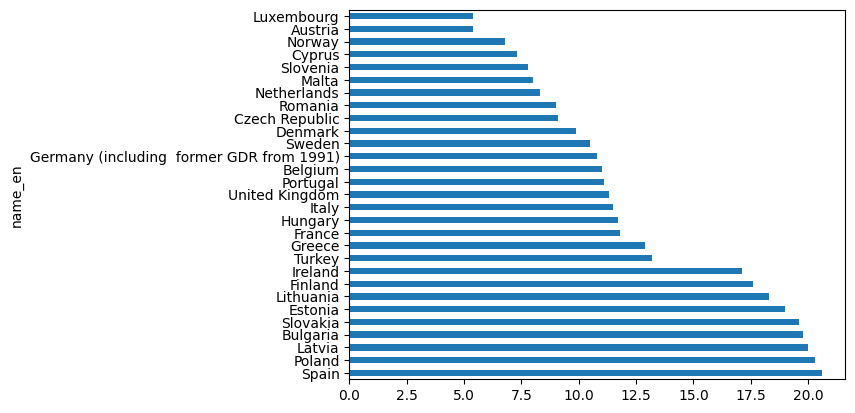

In [51]:
grouped.plot(kind='barh')

# We add plt.show() to properly render the chart
plt.show()

Let's try another plot. Our full DataFrame is what's called a time-series -- we have repeated observations of various countries' unemployment rates over time. We typically plot time-series using line-plots, so let's make a line plot examining Spain and Portugal's unemployment rates.  

To make this sort of plot simpler, we'll start by making our date column into the DataFrame's index:

In [52]:
unemployment_merged = unemployment_merged.set_index('date')

In [53]:
unemployment_merged.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1993-01-01,at,sa,1993.01,144000,3.8,1993,1,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-02-01,at,sa,1993.02,145000,3.8,1993,2,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-03-01,at,sa,1993.03,147000,3.9,1993,3,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-04-01,at,sa,1993.04,149000,3.9,1993,4,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-05-01,at,sa,1993.05,151000,4.0,1993,5,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598


We will also use boolean indexing to select on those observations that are for Spain. We'll save that as a new DataFrame, `spain`:

In [54]:
spain = unemployment_merged[unemployment_merged['name_en'] == 'Spain']
spain.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1986-04-01,es,sa,1986.04,2518000,17.7,1986,4,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-05-01,es,sa,1986.05,2502000,17.5,1986,5,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-06-01,es,sa,1986.06,2481000,17.4,1986,6,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-07-01,es,sa,1986.07,2485000,17.4,1986,7,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-08-01,es,sa,1986.08,2476000,17.3,1986,8,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296


Now we can easily access Spain's unemployment rate, with the date for each observation included as the index:

In [55]:
spain['unemployment_rate']

date
1986-04-01    17.7
1986-05-01    17.5
1986-06-01    17.4
1986-07-01    17.4
1986-08-01    17.3
              ... 
2010-07-01    20.3
2010-08-01    20.5
2010-09-01    20.6
2010-11-01    20.4
2010-12-01    20.2
Name: unemployment_rate, Length: 272, dtype: float64

Let's repeat the same boolean indexing we used for Spain, but now for Portugal:

In [58]:
portugal = unemployment_merged[unemployment_merged['name_en'] == 'Portugal']

In [59]:
spain.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1986-04-01,es,sa,1986.04,2518000,17.7,1986,4,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-05-01,es,sa,1986.05,2502000,17.5,1986,5,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-06-01,es,sa,1986.06,2481000,17.4,1986,6,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-07-01,es,sa,1986.07,2485000,17.4,1986,7,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-08-01,es,sa,1986.08,2476000,17.3,1986,8,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296


In [60]:
portugal.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1983-01-01,pt,sa,1983.01,345000,7.5,1983,1,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-02-01,pt,sa,1983.02,348000,7.6,1983,2,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-03-01,pt,sa,1983.03,353000,7.7,1983,3,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-04-01,pt,sa,1983.04,359000,7.9,1983,4,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-05-01,pt,sa,1983.05,366000,8.0,1983,5,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941


We'll take advantage of the `.plot()` function, simply calling `spain['unemployment_rate'].plot()`. We don't need to supply any argument to `.plot()` since we are using the default plot style -- a line-plot. We do add some other commands to add a y-axis label and render the plot.

In [61]:
spain['unemployment_rate']

date
1986-04-01    17.7
1986-05-01    17.5
1986-06-01    17.4
1986-07-01    17.4
1986-08-01    17.3
              ... 
2010-07-01    20.3
2010-08-01    20.5
2010-09-01    20.6
2010-11-01    20.4
2010-12-01    20.2
Name: unemployment_rate, Length: 272, dtype: float64

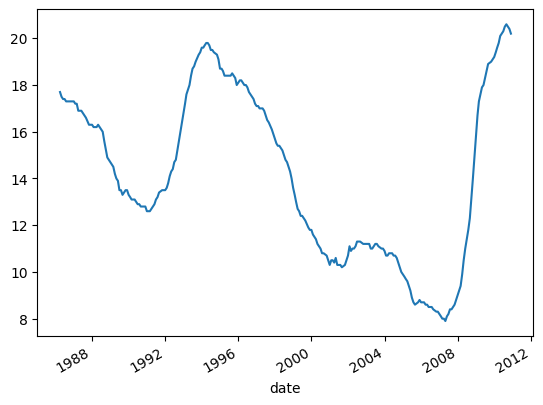

In [62]:
spain['unemployment_rate'].plot()

# We add plt.show() to properly render the chart
plt.show()

Layering plots will involve simply calling multiple `.plot()` commands in the same Jupyter cell. We can add some basic styling as well, such as labels, a legend, and a title.

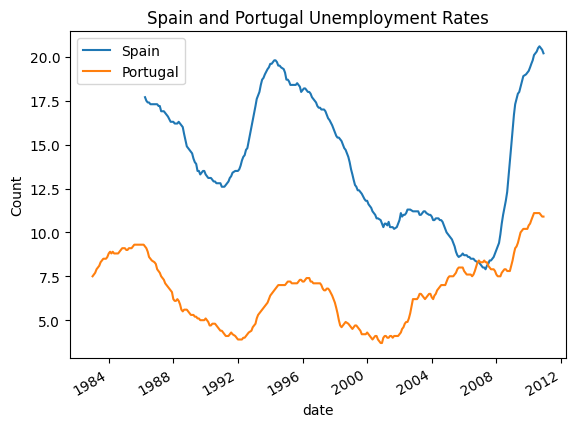

In [63]:
# Plot commands
spain['unemployment_rate'].plot()
portugal['unemployment_rate'].plot()

# Styling
plt.legend(["Spain", "Portugal"])
plt.ylabel("Count")
plt.title("Spain and Portugal Unemployment Rates")
plt.show()

# 🎉 Well Done!

This workshop series took us through the basics of data analysis using `pandas`. We indexed data using boolean logic, grouped data to perform conditional analyses, and we create basic but informative visualizations.

## More Workshops!

D-Lab teaches workshops that allow you to practice more with DataFrames and visualization.

- To learn other fundamental Python topics, check out D-Lab's [Python Intermediate workshop](https://github.com/dlab-berkeley/Python-Intermediate-Pilot).
- To learn more about data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).